In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [2]:
# Read the data
covid = pd.read_csv('../COVID/OxCGRT_GBR_latest.csv')
covid_scot = covid.loc[covid.RegionName=='Scotland'][['CountryName','RegionName','Date',
                                         'StringencyIndex_Average','StringencyIndex_Average_ForDisplay']]

covid_scot.Date = pd.to_datetime(covid_scot.Date.apply(str))
covid_scot.set_index('Date', inplace=True)

In [10]:
dates = [datetime(2022, 5, 28),datetime(2022, 6, 28)]
covid_scot.loc[dates[0]:dates[1]]

,CountryName,RegionName,StringencyIndex_Average,StringencyIndex_Average_ForDisplay
Date,,,,
2022-05-28,United Kingdom,Scotland,11.11,11.11
2022-05-29,United Kingdom,Scotland,11.11,11.11
2022-05-30,United Kingdom,Scotland,11.11,11.11
2022-05-31,United Kingdom,Scotland,11.11,11.11
2022-06-01,United Kingdom,Scotland,11.11,11.11
2022-06-02,United Kingdom,Scotland,11.11,11.11
2022-06-03,United Kingdom,Scotland,NaN,NaN
2022-06-04,United Kingdom,Scotland,NaN,NaN
2022-06-05,United Kingdom,Scotland,NaN,NaN


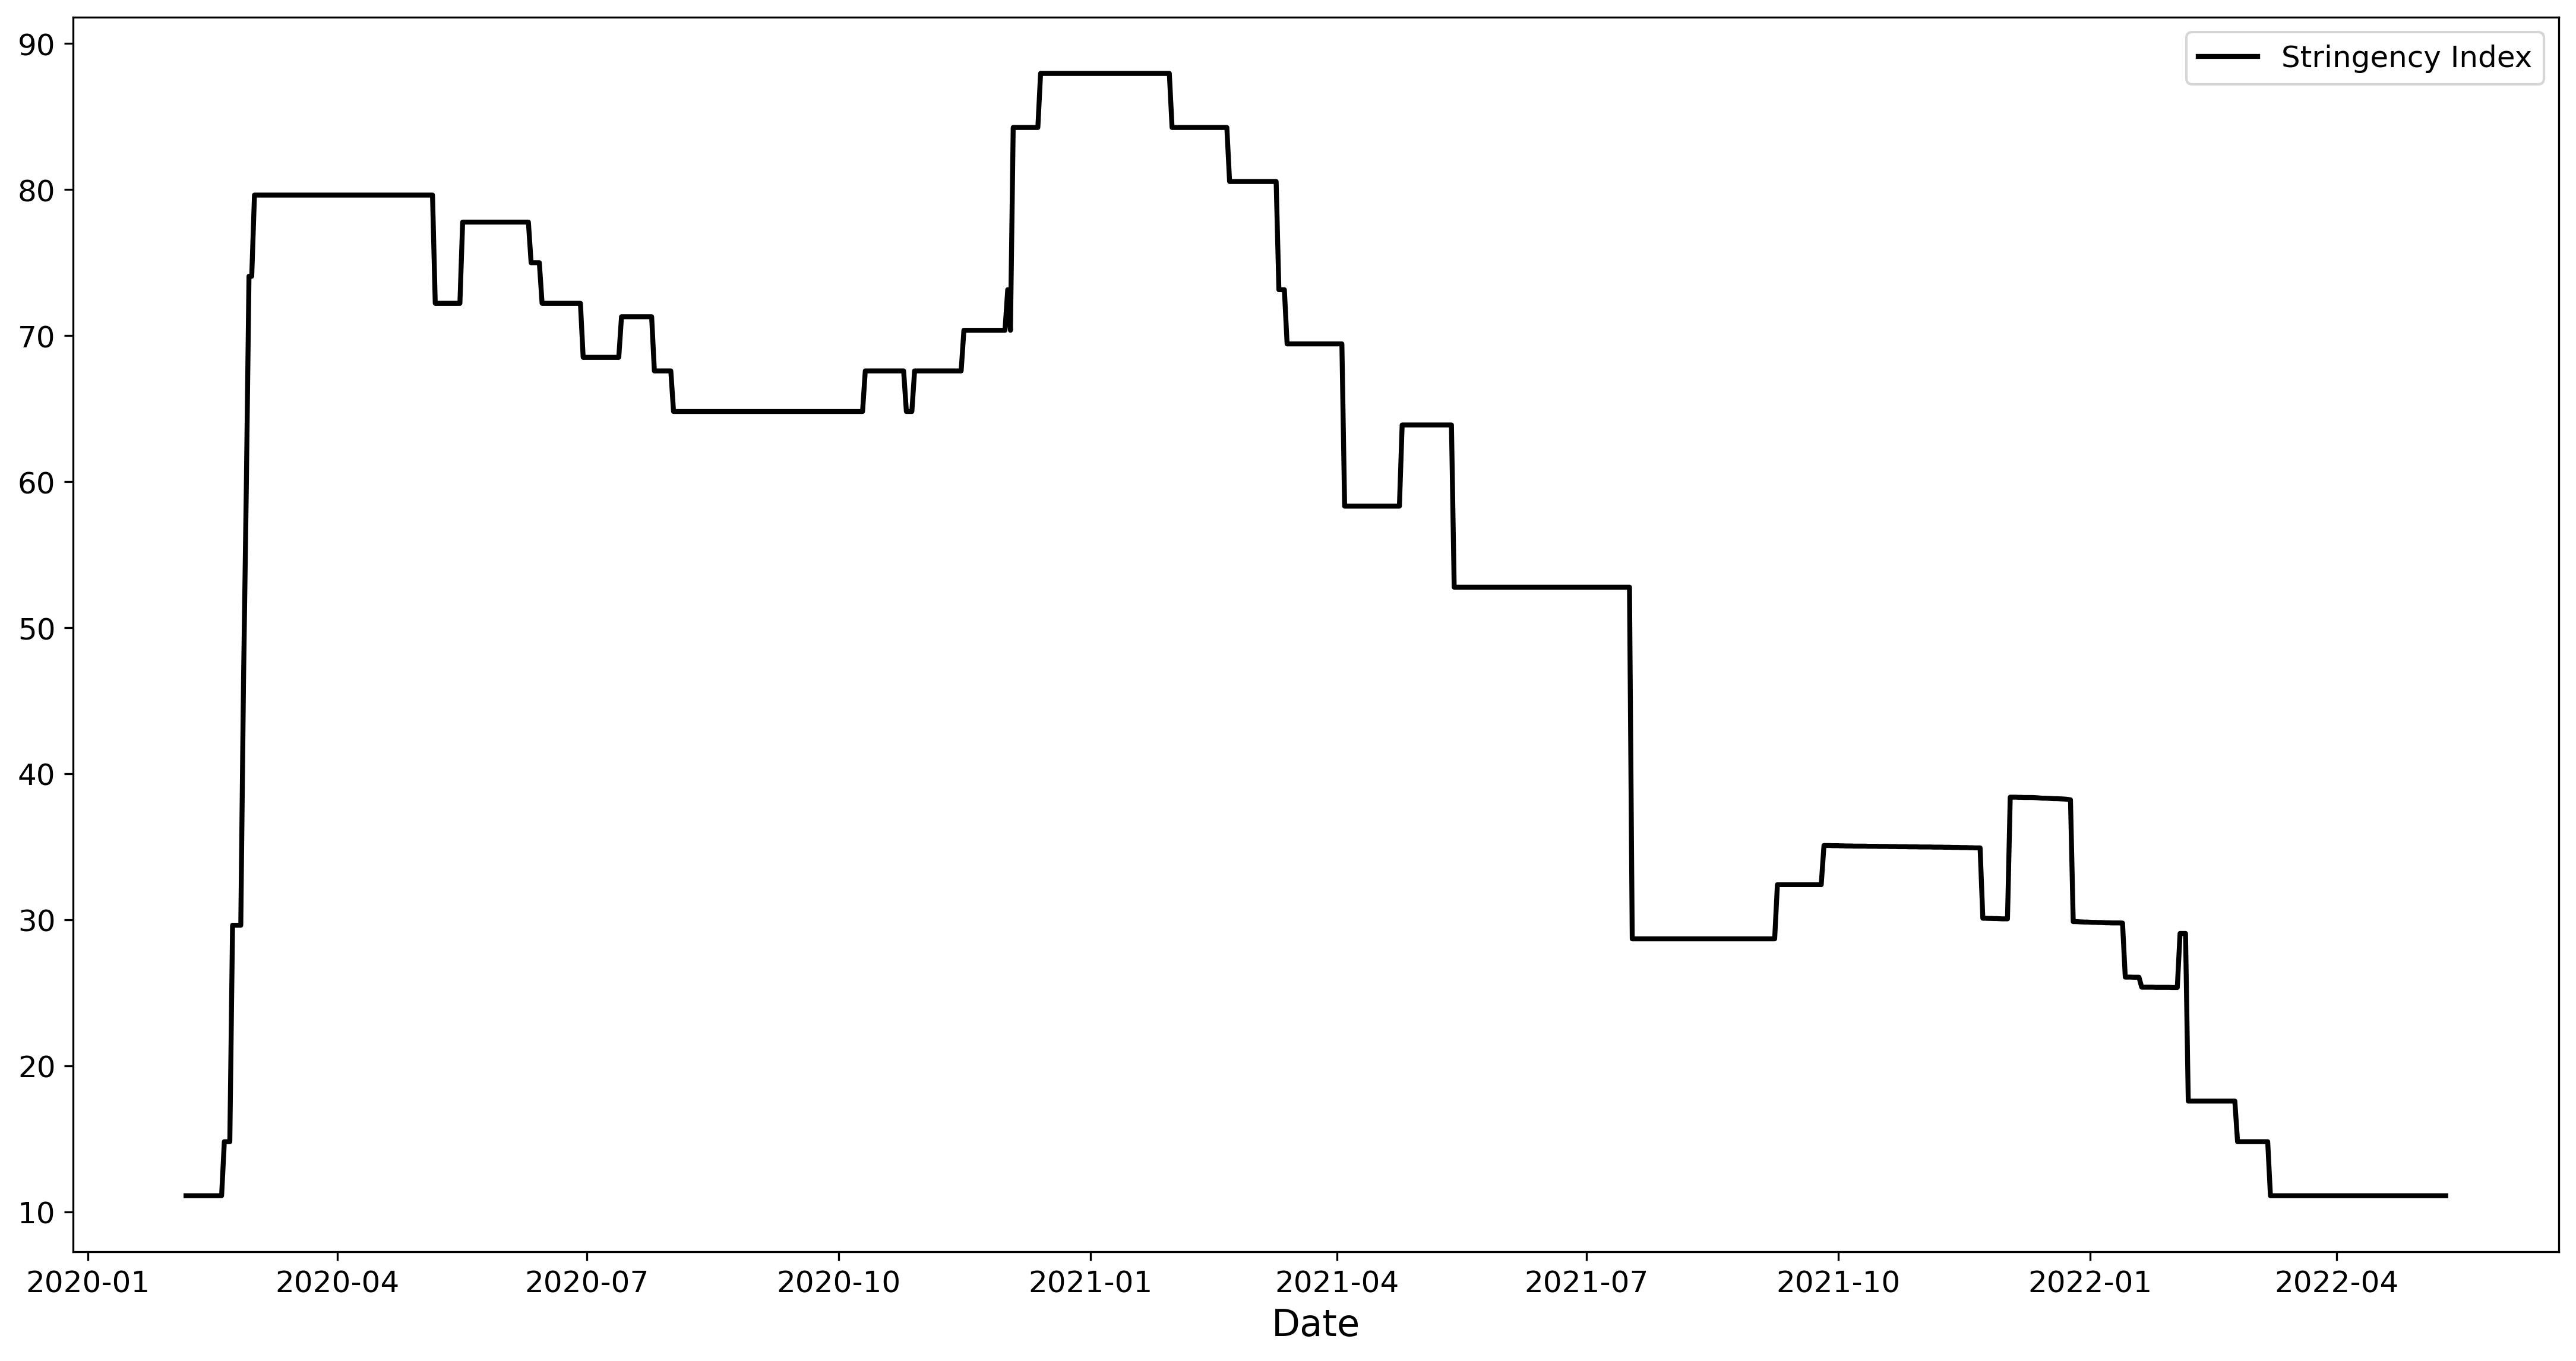

In [11]:
# Create a frame for plot
fig, ax2 = plt.subplots(figsize=(18, 9),dpi=300)

# Plot
f1 = ax2.plot(covid_scot['StringencyIndex_Average'], label='Stringency Index',
              color='black', alpha=1, linewidth=2)

ax2.xaxis.set_major_locator(mdates.RRuleLocator(mdates.rrulewrapper(mdates.MONTHLY, interval=3)))

# show legend 
fs = f1
labs = [l.get_label() for l in fs]
ax2.legend(fs, labs, loc='upper right', fontsize=12)

# set x and y label
ax2.set_xlabel('Date',fontsize=15)

# set ticks size of two axis
ax2.tick_params(labelsize=12)

plt.show()

In [12]:
traffic_data = pd.read_csv('../Traffic data/SCOOT/data_470_hourly/flows/GD030A_S.csv')

In [13]:
traffic_data.iloc[traffic_data.loc[traffic_data.date =='2022-06-03'].index.min():]

,date,time,flow
22422,2022-06-03,0,102
22423,2022-06-03,1,127
22424,2022-06-03,2,60
22425,2022-06-03,3,12
22426,2022-06-03,4,9
...,...,...,...
33638,2023-09-30,19,129
33639,2023-09-30,20,119
33640,2023-09-30,21,106
33641,2023-09-30,22,88


#### train_set = traffic_full['2022-06-03 00:00:00':'2023-03-31 23:00:00'] 

#### valid_set = traffic_full['2023-04-01 00:00:00':'2023-06-30 23:00:00']

#### test_set = traffic_full['2023-07-01 00:00:00':]

#### Proportion of train_set : 0.6227
#### Proportion of valid_set : 0.1876
#### Proportion of test_set : 0.1897